In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import datetime 

In [2]:
dataset = pd.read_csv('nlp-getting-started/train.csv', index_col='text', parse_dates=True)

In [3]:
dataset.head()

,id,keyword,location,target
text,,,,
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NaN,NaN,1
Forest fire near La Ronge Sask. Canada,4,NaN,NaN,1
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,5,NaN,NaN,1
"13,000 people receive #wildfires evacuation orders in California",6,NaN,NaN,1
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,7,NaN,NaN,1


In [4]:
dataset.isna().any()

id          False
keyword      True
location     True
target      False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all to The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 297.4+ KB


In [6]:
# Blurring out the first seven lines of the dataset for predictions
dataset.rolling(7).mean().head(20)

,id,target
text,,
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,NaN,NaN
Forest fire near La Ronge Sask. Canada,NaN,NaN
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,NaN,NaN
"13,000 people receive #wildfires evacuation orders in California",NaN,NaN
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,NaN,NaN
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,NaN,NaN
"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",5.857143,1.000000
I'm on top of the hill and I can see a fire in the woods...,7.571429,1.000000
There's an emergency evacuation happening now in the building across the street,9.000000,1.000000


In [7]:
training_set = dataset['target']
training_set = pd.DataFrame(training_set)

In [8]:
# Doing the feature scaling in the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 7611):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Making the imports to make the neural network
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [11]:
regressor = Sequential()

# Adding the first LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 50))

In [14]:
# Compiling the model 
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model 
history = regressor.fit(X_train, y_train, epochs = 5, batch_size = 30)

Epoch 1/5
252/252 [==============================] - 44s 138ms/step - loss: 0.2113
Epoch 2/5
252/252 [==============================] - 34s 134ms/step - loss: 0.2047
Epoch 3/5
252/252 [==============================] - 32s 128ms/step - loss: 0.2014
Epoch 4/5
252/252 [==============================] - 41s 161ms/step - loss: 0.2016
Epoch 5/5
252/252 [==============================] - 35s 139ms/step - loss: 0.2082


In [15]:
dataset_test = pd.read_csv('nlp-getting-started/test.csv',index_col="text",parse_dates=True)

In [16]:
dataset_test.head()

,id,keyword,location,target
text,,,,
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NaN,NaN,1
Forest fire near La Ronge Sask. Canada,4,NaN,NaN,1
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,5,NaN,NaN,1
"13,000 people receive #wildfires evacuation orders in California",6,NaN,NaN,1
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,7,NaN,NaN,1


In [22]:
real_target = dataset_test.iloc[:, 3:4].values

In [23]:
print(real_target)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]


In [24]:
test_set=dataset_test['target']
test_set=pd.DataFrame(test_set)

In [37]:
# Predictions
dataset_total = pd.concat((dataset['target'], dataset_test['target']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    print(X_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_target = regressor.predict(X_test)
predicted_target = sc.inverse_transform(predicted_target)

print(predicted_target)

[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])]
[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])]
[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1.

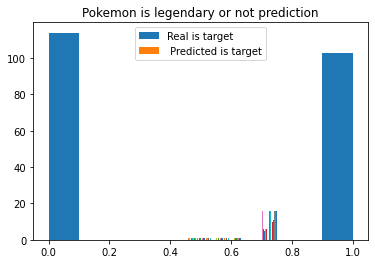

In [34]:
# Visualising the results (Plotting them on a line chart)
plt.hist(real_target, label = 'Real is target')
plt.hist(predicted_target, label = ' Predicted is target')
plt.legend()
plt.title('Pokemon is legendary or not prediction')
plt.show()